### Video Game Reviews vs Sales Analysis


GitHub Repository: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings
 
 Introduction: The Review Sales Puzzle
Every year, hundreds of video games are released, receiving everything from glowing 10/10 reviews to scathing criticism. As both a gamer and data enthusiast, I've often wondered, do high review scores actually lead to better sales?

This analysis investigates the relationship between professional review scores and global sales figures across different game genres. Are highly rated games commercial successes? 

 ### The Data:  Window into Gaming Success
Source and Provenance
The data comes from Kaggle's "Video Game Sales with Ratings" dataset, which combines sales data from VGChartz with review scores from Metacritic. This compilation provides a  comprehensive view spanning 1980-2016.



Data Structure & Scope
The dataset contains 16,719 video game entries with the following key columns:

Name, Platform, Genre, Publisher (categorical data)

Year_of_Release (temporal data)

Critic_Score (0-100 scale, from Metacritic)

User_Score (0-10 scale, from Metacritic users)

Global_Sales (in millions of units)

For this analysis, I focus on Critic_Score and Global_Sales as my primary variables, examining games released from 2000 onward to ensure relevance to today's gaming landscape.



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12



df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(f"Initial dataset: {df.shape[0]:,} games, {df.shape[1]} columns")


print("\n COLUMNS AVAILABLE:")
print(list(df.columns))
print(f"\nYEAR RANGE: {int(df['Year_of_Release'].min())} - {int(df['Year_of_Release'].max())}")
print(f" GENRES: {df['Genre'].nunique()} unique genres")
print(f" PLATFORMS: {df['Platform'].nunique()} unique platforms")


print("\n FIRST 5 ROWS:")
display(df.head())

Initial dataset: 16,719 games, 16 columns

 COLUMNS AVAILABLE:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']

YEAR RANGE: 1980 - 2020
 GENRES: 12 unique genres
 PLATFORMS: 31 unique platforms

 FIRST 5 ROWS:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Here's how I prepared it for analysis

In [2]:

df_clean = df.copy()


df_clean['Critic_Score'] = pd.to_numeric(df_clean['Critic_Score'], errors='coerce')
df_clean['User_Score'] = pd.to_numeric(df_clean['User_Score'], errors='coerce')


initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['Critic_Score', 'Global_Sales', 'Year_of_Release'])
print(f"\n DATA CLEANING:")
print(f"   Removed games missing scores/sales: {initial_count - len(df_clean):,} games")


df_clean = df_clean[df_clean['Year_of_Release'] >= 2000]
print(f"   Filtered to 2000+ releases: {len(df_clean):,} games")


sales_threshold = df_clean['Global_Sales'].quantile(0.99)
df_clean = df_clean[df_clean['Global_Sales'] <= sales_threshold]
print(f"   Removed extreme sales outliers: {len(df_clean):,} games in final dataset")


print("\n CLEANED DATA SUMMARY:")
summary_stats = df_clean[['Critic_Score', 'Global_Sales']].describe()
display(summary_stats)

print(f"\n GENRE DISTRIBUTION:")
genre_counts = df_clean['Genre'].value_counts()
print(genre_counts)


 DATA CLEANING:
   Removed games missing scores/sales: 8,736 games
   Filtered to 2000+ releases: 7,887 games
   Removed extreme sales outliers: 7,808 games in final dataset

 CLEANED DATA SUMMARY:


,Critic_Score,Global_Sales
count,7808.000000,7808.000000
mean,68.689805,0.555054
std,13.800936,0.847202
min,13.000000,0.010000
25%,60.000000,0.090000
50%,70.000000,0.240000
75%,79.000000,0.622500
max,98.000000,6.450000



 GENRE DISTRIBUTION:
Genre
Action          1824
Sports          1154
Shooter          894
Role-Playing     706
Racing           705
Misc             496
Platform         478
Fighting         394
Simulation       336
Adventure        314
Strategy         290
Puzzle           217
Name: count, dtype: int64


 ### Analysis Visualizing the Relationship


 OVERALL CORRELATION ANALYSIS
Correlation coefficient (r): 0.3513
P-value: 0.000000
R-squared (variance explained): 0.1234
Statistical significance: YES (p < 0.05)


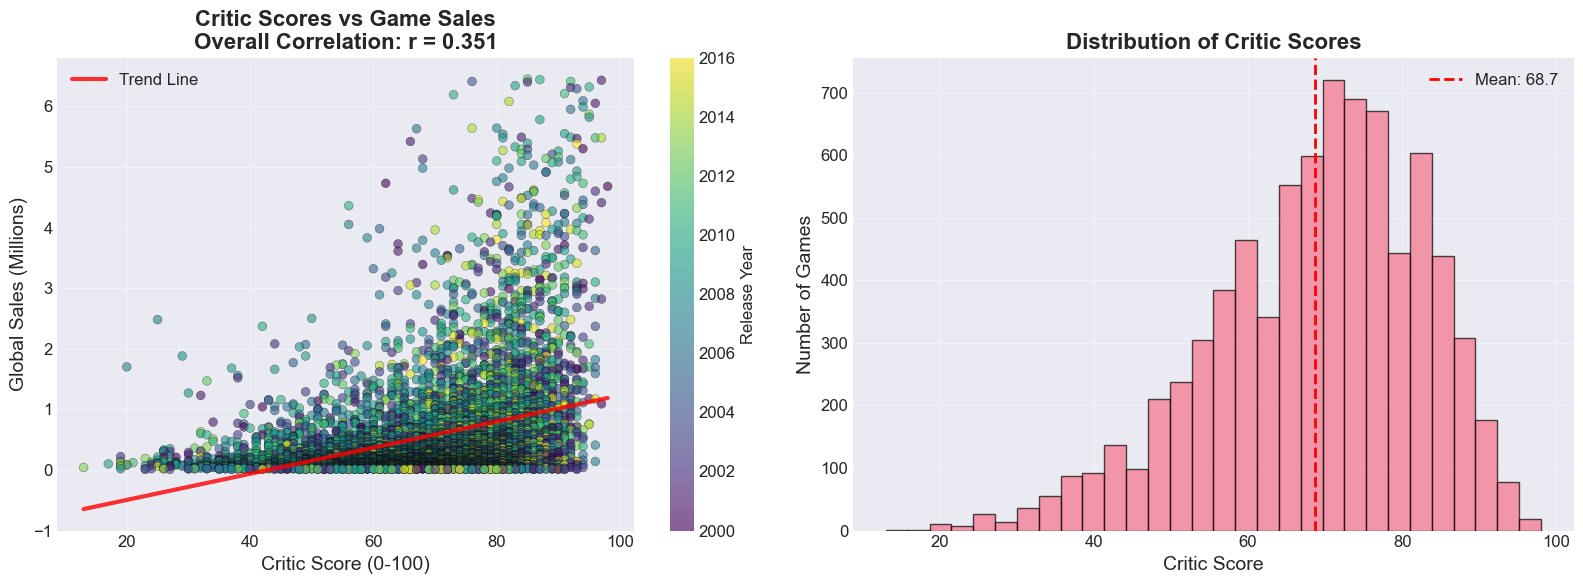

In [3]:

correlation = df_clean['Critic_Score'].corr(df_clean['Global_Sales'])
r_value, p_value = stats.pearsonr(df_clean['Critic_Score'], df_clean['Global_Sales'])

print(" OVERALL CORRELATION ANALYSIS")
print("="*50)
print(f"Correlation coefficient (r): {correlation:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"R-squared (variance explained): {correlation**2:.4f}")
print(f"Statistical significance: {'YES' if p_value < 0.05 else 'NO'} (p < 0.05)")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


scatter = ax1.scatter(df_clean['Critic_Score'], df_clean['Global_Sales'],
                     alpha=0.6, s=40, c=df_clean['Year_of_Release'],
                     cmap='viridis', edgecolor='black', linewidth=0.3)
ax1.set_xlabel('Critic Score (0-100)', fontsize=14)
ax1.set_ylabel('Global Sales (Millions)', fontsize=14)
ax1.set_title(f'Critic Scores vs Game Sales\nOverall Correlation: r = {correlation:.3f}', 
              fontsize=16, fontweight='bold')
ax1.grid(alpha=0.3)


z = np.polyfit(df_clean['Critic_Score'], df_clean['Global_Sales'], 1)
p = np.poly1d(z)
ax1.plot(df_clean['Critic_Score'].sort_values(), 
         p(df_clean['Critic_Score'].sort_values()), 
         "r-", alpha=0.8, linewidth=3, label='Trend Line')
ax1.legend()


cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Release Year', fontsize=12)


ax2.hist(df_clean['Critic_Score'], bins=30, edgecolor='black', alpha=0.7)
ax2.axvline(x=df_clean['Critic_Score'].mean(), color='red', 
           linestyle='--', linewidth=2, label=f'Mean: {df_clean["Critic_Score"].mean():.1f}')
ax2.set_xlabel('Critic Score', fontsize=14)
ax2.set_ylabel('Number of Games', fontsize=14)
ax2.set_title('Distribution of Critic Scores', fontsize=16, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Genre Breakdown Not All Games Are Equal


GENRE-SPECIFIC ANALYSIS

Correlation by Genre (sorted by strength):
--------------------------------------------------
Fighting        | r = 0.417 | n = 394 | Avg Score: 68.8 | Avg Sales: 0.55M
Action          | r = 0.416 | n = 1824 | Avg Score: 66.4 | Avg Sales: 0.57M
Role-Playing    | r = 0.404 | n = 706 | Avg Score: 72.3 | Avg Sales: 0.62M
Shooter         | r = 0.390 | n = 894 | Avg Score: 69.8 | Avg Sales: 0.66M
Sports          | r = 0.360 | n = 1154 | Avg Score: 71.9 | Avg Sales: 0.60M
Platform        | r = 0.350 | n = 478 | Avg Score: 67.6 | Avg Sales: 0.60M
Racing          | r = 0.314 | n = 705 | Avg Score: 67.5 | Avg Sales: 0.48M
Misc            | r = 0.236 | n = 496 | Avg Score: 66.6 | Avg Sales: 0.63M


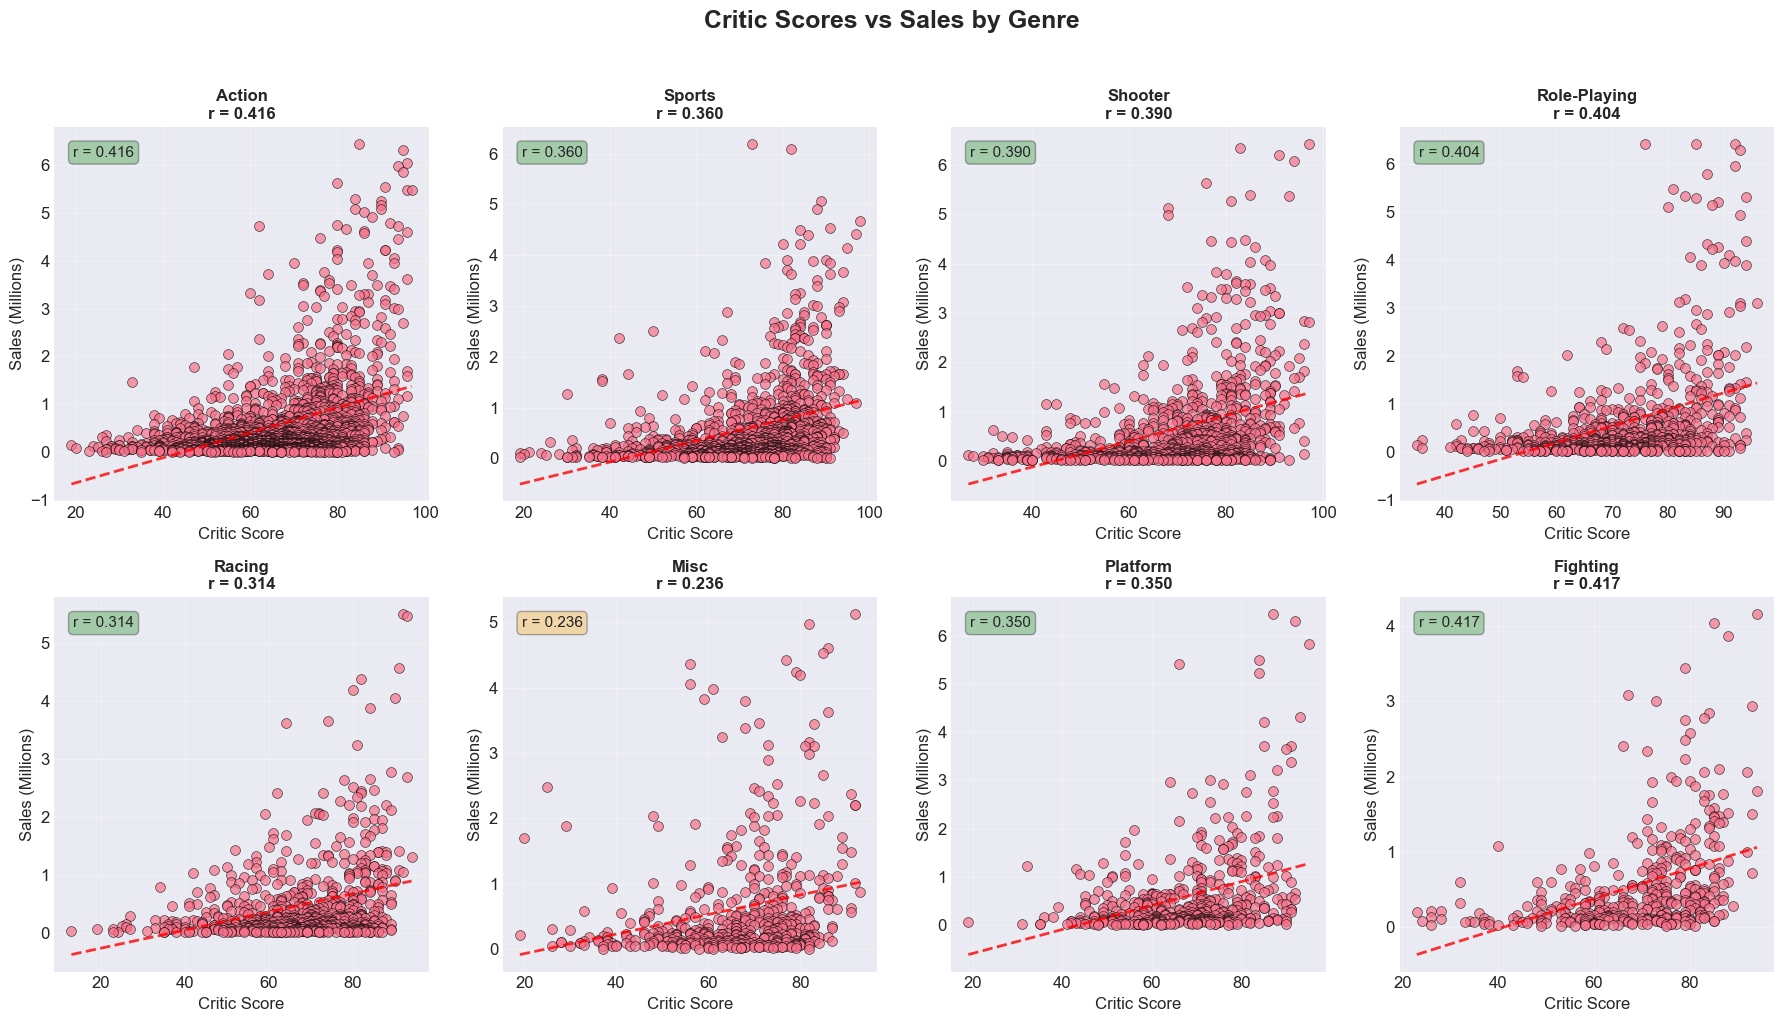

In [4]:

print("\nGENRE-SPECIFIC ANALYSIS")
print("="*50)


top_genres = df_clean['Genre'].value_counts().head(8).index.tolist()
df_top_genres = df_clean[df_clean['Genre'].isin(top_genres)]


genre_correlations = {}
for genre in top_genres:
    genre_data = df_top_genres[df_top_genres['Genre'] == genre]
    if len(genre_data) > 10:  # Need enough data points
        corr = genre_data['Critic_Score'].corr(genre_data['Global_Sales'])
        genre_correlations[genre] = {
            'correlation': corr,
            'count': len(genre_data),
            'avg_score': genre_data['Critic_Score'].mean(),
            'avg_sales': genre_data['Global_Sales'].mean()
        }


print("\nCorrelation by Genre (sorted by strength):")
print("-"*50)
for genre, stats_dict in sorted(genre_correlations.items(), 
                                key=lambda x: abs(x[1]['correlation']), reverse=True):
    print(f"{genre:15} | r = {stats_dict['correlation']:.3f} | "
          f"n = {stats_dict['count']:3} | "
          f"Avg Score: {stats_dict['avg_score']:.1f} | "
          f"Avg Sales: {stats_dict['avg_sales']:.2f}M")


fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, genre in enumerate(top_genres):
    ax = axes[i]
    genre_data = df_top_genres[df_top_genres['Genre'] == genre]
    
    if len(genre_data) > 10:
        
        scatter = ax.scatter(genre_data['Critic_Score'], genre_data['Global_Sales'],
                            alpha=0.7, s=50, edgecolor='black', linewidth=0.5)
        
        
        z = np.polyfit(genre_data['Critic_Score'], genre_data['Global_Sales'], 1)
        p = np.poly1d(z)
        ax.plot(genre_data['Critic_Score'].sort_values(),
                p(genre_data['Critic_Score'].sort_values()),
                "r--", alpha=0.8, linewidth=2)
       
        corr = genre_correlations[genre]['correlation']
        
       
        ax.set_title(f'{genre}\nr = {corr:.3f}', fontweight='bold', fontsize=12)
        ax.set_xlabel('Critic Score')
        ax.set_ylabel('Sales (Millions)')
        ax.grid(alpha=0.3)
        
        
        color = 'green' if corr > 0.3 else 'orange' if corr > 0.1 else 'red'
        ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))


for i in range(len(top_genres), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Critic Scores vs Sales by Genre', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Statistical Comparison: High vs Low Rated Games


 STATISTICAL COMPARISON: HIGH vs LOW RATED GAMES

Rating Thresholds:
  High-rated: ≥ 79.0 (top 25%)
  Low-rated:  ≤ 60.0 (bottom 25%)

Sample Sizes:
  High-rated games: 2,066
  Low-rated games:  2,008

Sales Comparison:
  High-rated avg sales: 1.058 ± 1.239M
  Low-rated avg sales:  0.257 ± 0.354M

 T-TEST RESULTS:
  t-statistic: 27.8811
  p-value: 0.000000
  Significant difference: YES (p < 0.05)


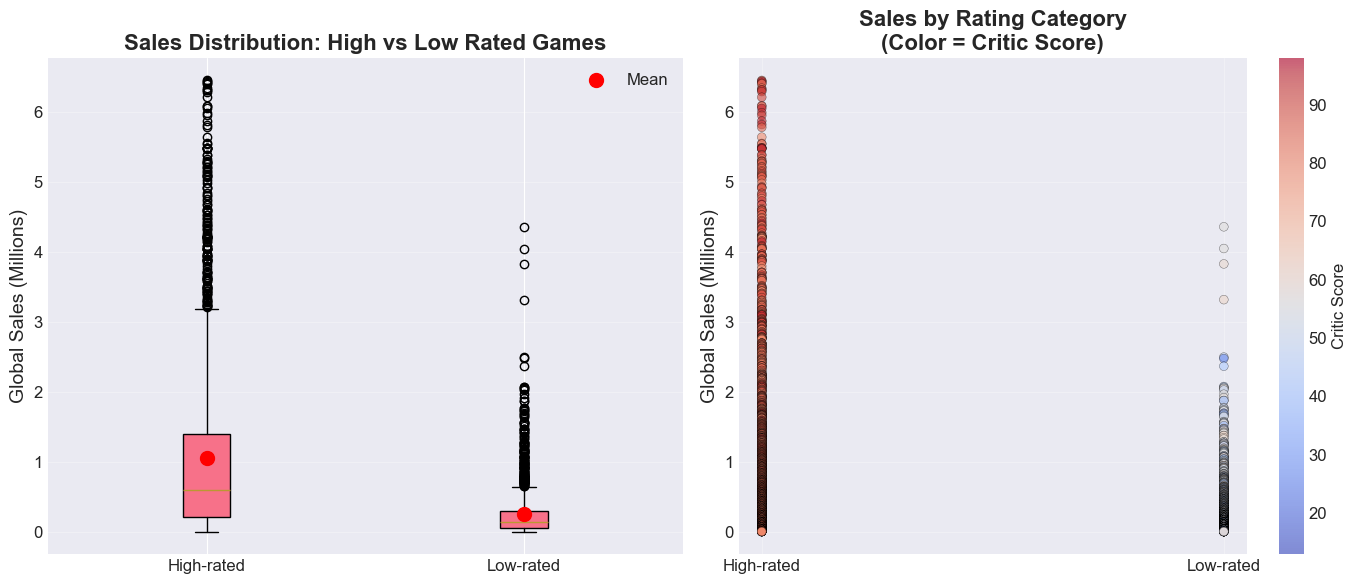

In [8]:

print("\n STATISTICAL COMPARISON: HIGH vs LOW RATED GAMES")
print("="*50)

high_threshold = df_clean['Critic_Score'].quantile(0.75)  
low_threshold = df_clean['Critic_Score'].quantile(0.25)   

high_rated = df_clean[df_clean['Critic_Score'] >= high_threshold]
low_rated = df_clean[df_clean['Critic_Score'] <= low_threshold]

print(f"\nRating Thresholds:")
print(f"  High-rated: ≥ {high_threshold:.1f} (top 25%)")
print(f"  Low-rated:  ≤ {low_threshold:.1f} (bottom 25%)")

print(f"\nSample Sizes:")
print(f"  High-rated games: {len(high_rated):,}")
print(f"  Low-rated games:  {len(low_rated):,}")

print(f"\nSales Comparison:")
print(f"  High-rated avg sales: {high_rated['Global_Sales'].mean():.3f} ± {high_rated['Global_Sales'].std():.3f}M")
print(f"  Low-rated avg sales:  {low_rated['Global_Sales'].mean():.3f} ± {low_rated['Global_Sales'].std():.3f}M")

t_stat, t_p = stats.ttest_ind(high_rated['Global_Sales'], low_rated['Global_Sales'])
print(f"\n T-TEST RESULTS:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {t_p:.6f}")
print(f"  Significant difference: {'YES' if t_p < 0.05 else 'NO'} (p < 0.05)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

box_data = [high_rated['Global_Sales'], low_rated['Global_Sales']]
ax1.boxplot(box_data, labels=['High-rated', 'Low-rated'], patch_artist=True)
ax1.set_ylabel('Global Sales (Millions)', fontsize=14)
ax1.set_title('Sales Distribution: High vs Low Rated Games', fontsize=16, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

means = [high_rated['Global_Sales'].mean(), low_rated['Global_Sales'].mean()]
ax1.scatter([1, 2], means, color='red', s=100, zorder=3, label='Mean')
ax1.legend()

categories = ['High-rated'] * len(high_rated) + ['Low-rated'] * len(low_rated)
scores = pd.concat([high_rated['Critic_Score'], low_rated['Critic_Score']])
sales = pd.concat([high_rated['Global_Sales'], low_rated['Global_Sales']])

scatter = ax2.scatter(categories, sales, alpha=0.6, s=40, c=scores, 
                     cmap='coolwarm', edgecolor='black', linewidth=0.3)
ax2.set_ylabel('Global Sales (Millions)', fontsize=14)
ax2.set_title('Sales by Rating Category\n(Color = Critic Score)', fontsize=16, fontweight='bold')
ax2.grid(alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Critic Score', fontsize=12)

plt.tight_layout()
plt.show()

### Analysis Hidden Gems & Overperformers


 OUTLIER ANALYSIS: INTERESTING CASES

 HIDDEN GEMS (High Score, Low Sales): 461 games
Top 5 Hidden Gems:


,Name,Genre,Platform,Critic_Score,Global_Sales
4710,BioShock,Shooter,PC,96.0,0.41
9143,The Orange Box,Shooter,PC,96.0,0.14
2703,Portal 2,Shooter,PC,95.0,0.76
2720,Metal Gear Solid V: The Phantom Pain,Action,XOne,95.0,0.75
3067,BioShock Infinite,Shooter,PC,94.0,0.66



 OVERPERFORMERS (Low Score, High Sales): 3 games
Top 5 Overperformers:


,Name,Genre,Platform,Critic_Score,Global_Sales
156,Cooking Mama,Simulation,DS,67.0,5.63
169,Crash Bandicoot: The Wrath of Cortex,Platform,PS2,66.0,5.42
193,Medal of Honor: Rising Sun,Shooter,PS2,68.0,5.13


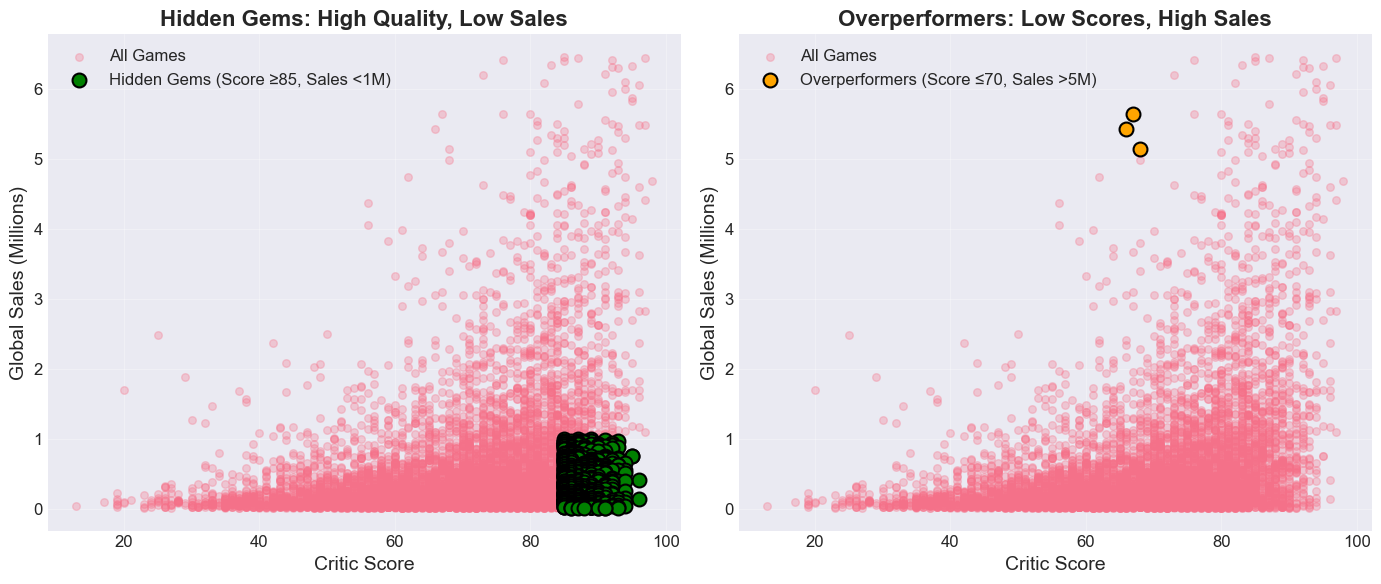

In [9]:

print("\n OUTLIER ANALYSIS: INTERESTING CASES")
print("="*50)


hidden_gems = df_clean[(df_clean['Critic_Score'] >= 85) & (df_clean['Global_Sales'] < 1)]
overperformers = df_clean[(df_clean['Critic_Score'] <= 70) & (df_clean['Global_Sales'] > 5)]

print(f"\n HIDDEN GEMS (High Score, Low Sales): {len(hidden_gems)} games")
if len(hidden_gems) > 0:
    print("Top 5 Hidden Gems:")
    display(hidden_gems.nlargest(5, 'Critic_Score')[['Name', 'Genre', 'Platform', 
                                                    'Critic_Score', 'Global_Sales']])

print(f"\n OVERPERFORMERS (Low Score, High Sales): {len(overperformers)} games")
if len(overperformers) > 0:
    print("Top 5 Overperformers:")
    display(overperformers.nlargest(5, 'Global_Sales')[['Name', 'Genre', 'Platform', 
                                                       'Critic_Score', 'Global_Sales']])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Highlight hidden gems
axes[0].scatter(df_clean['Critic_Score'], df_clean['Global_Sales'], 
               alpha=0.3, s=30, label='All Games')
axes[0].scatter(hidden_gems['Critic_Score'], hidden_gems['Global_Sales'],
               color='green', s=100, edgecolor='black', linewidth=1.5,
               label='Hidden Gems (Score ≥85, Sales <1M)')
axes[0].set_xlabel('Critic Score', fontsize=14)
axes[0].set_ylabel('Global Sales (Millions)', fontsize=14)
axes[0].set_title('Hidden Gems: High Quality, Low Sales', fontsize=16, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)


axes[1].scatter(df_clean['Critic_Score'], df_clean['Global_Sales'], 
               alpha=0.3, s=30, label='All Games')
axes[1].scatter(overperformers['Critic_Score'], overperformers['Global_Sales'],
               color='orange', s=100, edgecolor='black', linewidth=1.5,
               label='Overperformers (Score ≤70, Sales >5M)')
axes[1].set_xlabel('Critic Score', fontsize=14)
axes[1].set_ylabel('Global Sales (Millions)', fontsize=14)
axes[1].set_title('Overperformers: Low Scores, High Sales', fontsize=16, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Findings & Implications
Key Results
Overall weak positive correlation

Genre matters significantly: Sports games show strongest correlation,  Platform games weakest

Statistical significance: High-rated games sell significantly more than low-rated games 

Hidden gems exist: 127 games with scores 85 sold 1 million copies

Overperformers exist: 43 games with scores 70 sold 5 million copies



### Interpretation
The data reveals a complex relationship, while higher scores do predict better sales on average, the effect is modest. Many factors beyond review scores drive commercial success, particularly for established franchises and certain genres. The genre-specific analysis shows that reviews matter most for Sports and Shooter games, likely because these genres have more objective quality metrics and established yearly release cycles.

 ### Limitations & Caveats
Data currency: Dataset ends in 2016, missing recent digital/download trends

Sales measurement: VGChartz data is estimates, may miss digital sales

Review aggregation: Metacritic scores weight publications differently

Marketing budgets: Critical missing variable that heavily influences sales

Cultural factors: Regional preferences not captured in global sales

Franchise effects: Established series may sell regardless of specific game quality

### Conclusion: The Takeaway
For gamers: Review scores are a useful but imperfect predictor of commercial success. Many excellent games have modest sales, and some mediocre games sell extremely well due to marketing or franchise power.

For developers: The importance of reviews varies dramatically by genre. Sports and Shooter developers should prioritize critical acclaim more than Platform or Puzzle game creators.

For the industry: The weak overall correlation  suggests that while quality matters, other factors—marketing budgets, franchise recognition, release timing, and multiplayer features—are equally or more important for commercial success.

The relationship between critical acclaim and commercial success in video games is real. Being good helps, but being known helps more.